### Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt

### Defining & Visualizing Graph

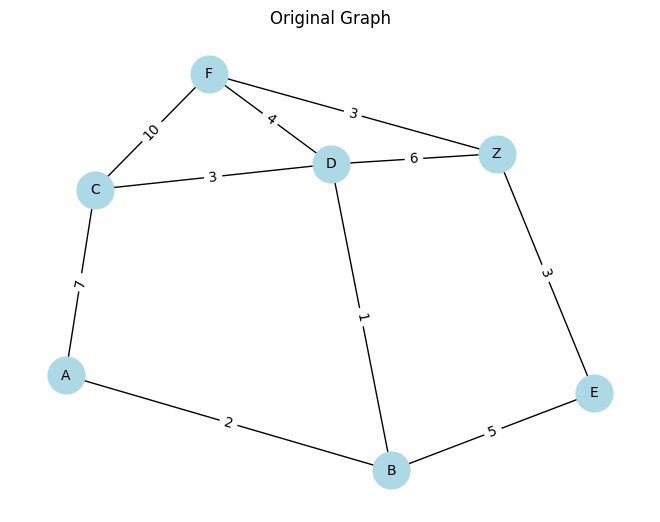

In [3]:
# Defining the graph (list of edges with weights)
edges = [
    ('A', 'B', 2),
    ('A', 'C', 7),
    ('B', 'D', 1),
    ('B', 'E', 5),
    ('C', 'D', 3),
    ('C', 'F', 10),
    ('D', 'F', 4),
    ('D','Z',6),
    ('E', 'Z', 3),
    ('F', 'Z', 3)
]

# Visualizing the original graph
def draw_graph(edges):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)

    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Original Graph")
    plt.show()

draw_graph(edges)


### Defining Kruskal's Algorithm for creation of MST

In [4]:
# Kruskal's Algorithm for Minimum Spanning Tree
class DisjointSet:
    def __init__(self, vertices):
        self.parent = {v: v for v in vertices}
        self.rank = {v: 0 for v in vertices}

    def find(self, vertex):
        if self.parent[vertex] != vertex:
            self.parent[vertex] = self.find(self.parent[vertex])
        return self.parent[vertex]

    def union(self, vertex1, vertex2):
        root1 = self.find(vertex1)
        root2 = self.find(vertex2)

        if root1 != root2:
            if self.rank[root1] > self.rank[root2]:
                self.parent[root2] = root1
            elif self.rank[root1] < self.rank[root2]:
                self.parent[root1] = root2
            else:
                self.parent[root2] = root1
                self.rank[root1] += 1

def kruskal_mst(edges):
    # Sort edges based on their weights
    sorted_edges = sorted(edges, key=lambda x: x[2])
    vertices = set(sum([[u, v] for u, v, _ in edges], []))  # Unique vertices
    ds = DisjointSet(vertices)

    mst = []
    for u, v, weight in sorted_edges:
        if ds.find(u) != ds.find(v):
            ds.union(u, v)
            mst.append((u, v, weight))

    return mst


### Defining Function for Step-wise MST creation

In [5]:
# Showing step-by-step MST creation
def kruskal_step_by_step(edges):
    sorted_edges = sorted(edges, key=lambda x: x[2])
    vertices = set(sum([[u, v] for u, v, _ in edges], []))
    ds = DisjointSet(vertices)

    mst = []
    for i, (u, v, weight) in enumerate(sorted_edges):
        print(f"Step {i+1}: Checking edge {u}-{v} with weight {weight}")
        if ds.find(u) != ds.find(v):
            ds.union(u, v)
            mst.append((u, v, weight))
            print(f"  --> Edge {u}-{v} added to MST")
        else:
            print(f"  --> Edge {u}-{v} creates a cycle and is skipped")

    return mst

# Step-by-step breakdown
print("Step-by-step MST creation process:")
kruskal_step_by_step(edges)


Step-by-step MST creation process:
Step 1: Checking edge B-D with weight 1
  --> Edge B-D added to MST
Step 2: Checking edge A-B with weight 2
  --> Edge A-B added to MST
Step 3: Checking edge C-D with weight 3
  --> Edge C-D added to MST
Step 4: Checking edge E-Z with weight 3
  --> Edge E-Z added to MST
Step 5: Checking edge F-Z with weight 3
  --> Edge F-Z added to MST
Step 6: Checking edge D-F with weight 4
  --> Edge D-F added to MST
Step 7: Checking edge B-E with weight 5
  --> Edge B-E creates a cycle and is skipped
Step 8: Checking edge D-Z with weight 6
  --> Edge D-Z creates a cycle and is skipped
Step 9: Checking edge A-C with weight 7
  --> Edge A-C creates a cycle and is skipped
Step 10: Checking edge C-F with weight 10
  --> Edge C-F creates a cycle and is skipped


[('B', 'D', 1),
 ('A', 'B', 2),
 ('C', 'D', 3),
 ('E', 'Z', 3),
 ('F', 'Z', 3),
 ('D', 'F', 4)]

### Visualizing the final MST

In [6]:
# Visualizing the Minimum Spanning Tree
def draw_mst(mst):
    G = nx.Graph()
    G.add_weighted_edges_from(mst)

    pos = nx.spring_layout(G)  # Positions for all nodes
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=700, font_size=10)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title("Minimum Spanning Tree (MST) - Kruskal's Algorithm")
    plt.show()

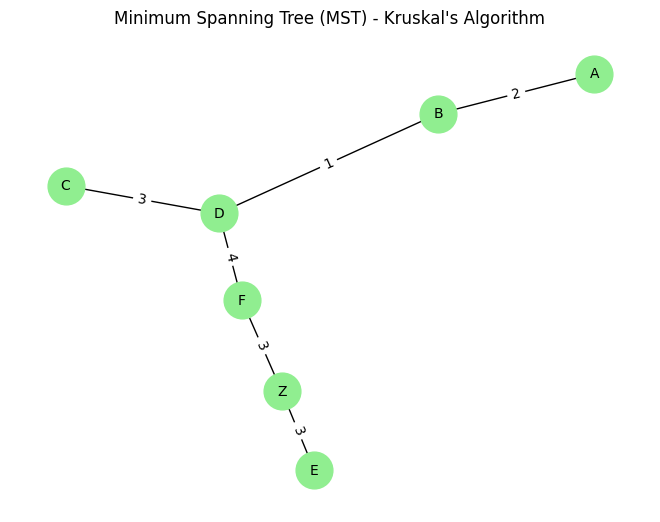

In [7]:
# Run the algorithm
mst = kruskal_mst(edges)
draw_mst(mst)  # Visualize final MST